In [1]:
import matplotlib.pyplot as plt

import numpy as np
import cv2
import torch
import torch.nn.functional as F
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torch.autograd import Variable

In [9]:
test_dir = 'data/test/'

test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_data = datasets.ImageFolder(
    test_dir, transform=test_transforms
)

test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('model/resnet_classifier.pth')
model.eval()

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
classes = test_data.classes

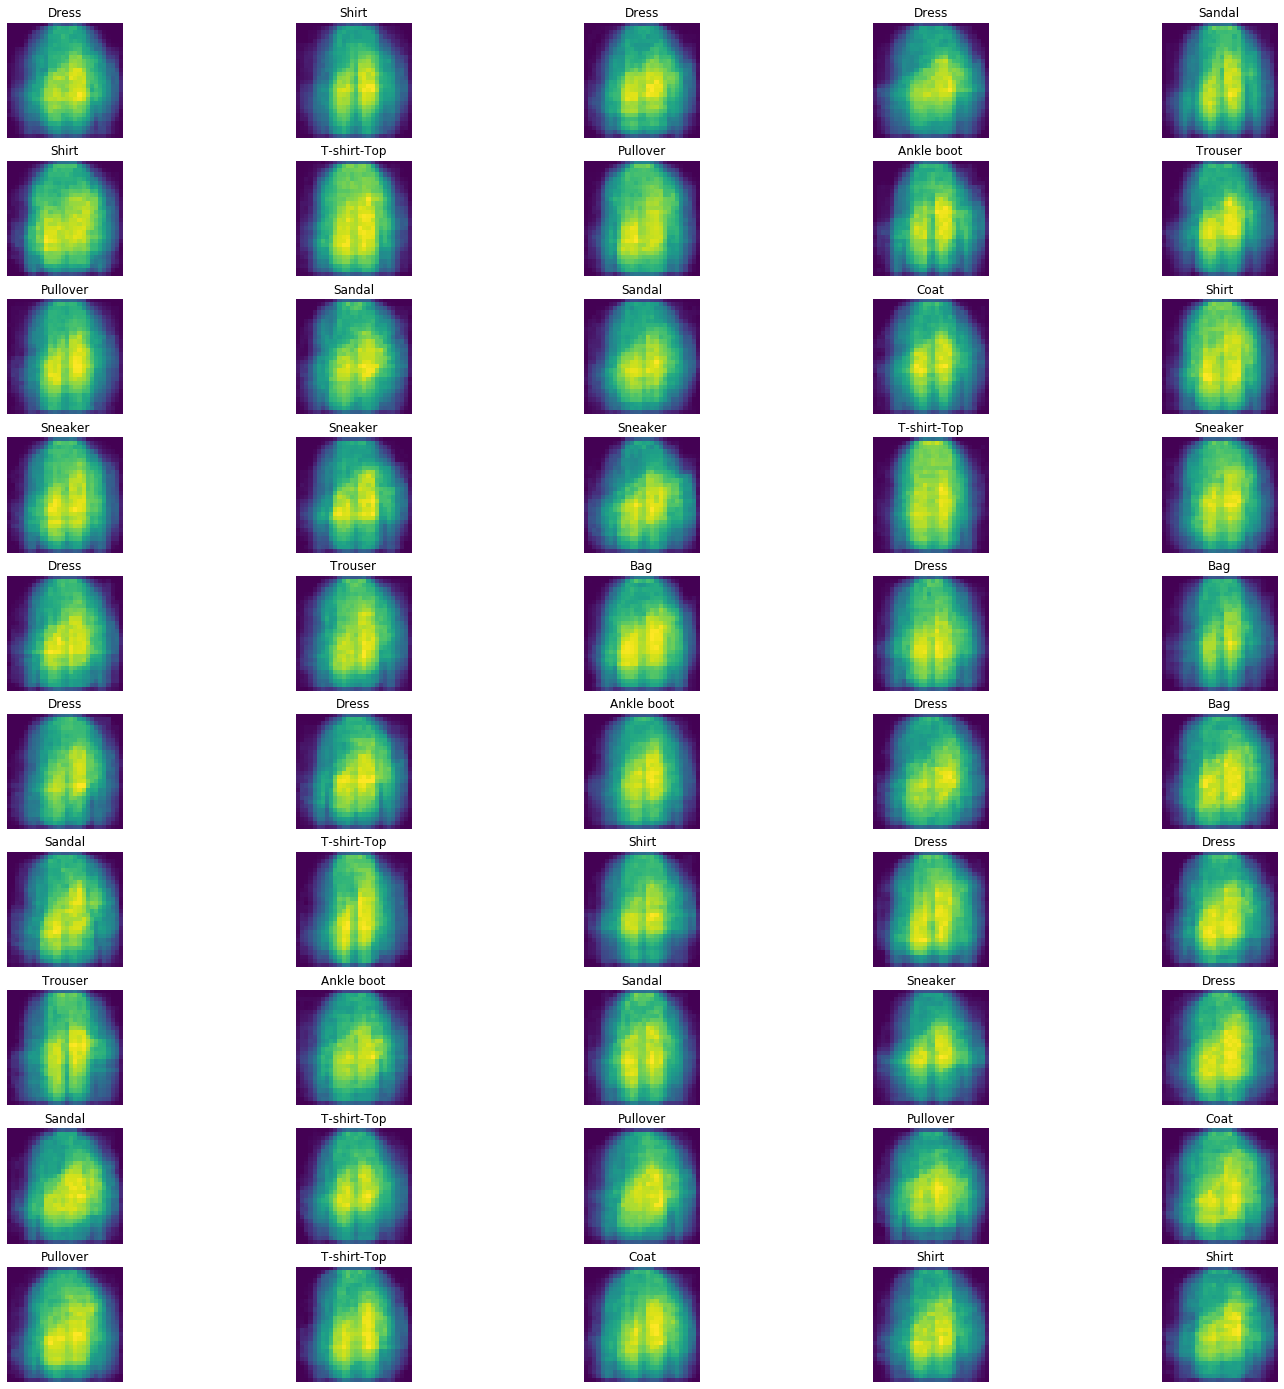

In [12]:
count = 0
fig=plt.figure(figsize=(25,25))

row = 10
column = 5
count_stop = row * column
for image, labels in test_loader:
    data_input = Variable(image)
    data_input = data_input.to(device)
    output = model(data_input)
    
    index = output.data.cpu().numpy()[0].argmax()
    count += 1
    
    # Remove the first 2 dimensions (batch_size, channel)
    # Eg (64, 1, 28, 28) -> (28, 28)
    normalized_image = torch.mean(torch.mean(image, 0), 0)
    selected_class = classes[index]
    
    # plot images
    sub = fig.add_subplot(row, column, count)
    sub.set_title(selected_class)
    plt.axis('off')
    plt.imshow(normalized_image)
    if count == count_stop:
        break